In [119]:
# Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
pd.options.mode.chained_assignment = None 
import math
import seaborn as sns

In [8]:
# Load Data 
stock = 'ICICIBANK.NS'
data = yf.download(tickers=stock, interval='1d', period='1y')

[*********************100%%**********************]  1 of 1 completed


In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,913.799988,917.599976,909.299988,914.049988,906.248291,12927203
2023-11-02,920.049988,924.799988,912.799988,919.950012,912.097961,9747311
2023-11-03,928.549988,934.500000,926.799988,933.799988,925.829712,7146961
2023-11-06,941.000000,947.750000,937.400024,945.450012,937.380310,10338367
2023-11-07,943.599976,950.450012,930.450012,948.099976,940.007629,15704942
...,...,...,...,...,...,...
2024-10-28,1285.500000,1307.800049,1280.599976,1292.849976,1292.849976,24096412
2024-10-29,1301.349976,1335.349976,1299.250000,1331.849976,1331.849976,20656117
2024-10-30,1324.000000,1330.900024,1305.599976,1312.150024,1312.150024,15055031


<Axes: xlabel='Date'>

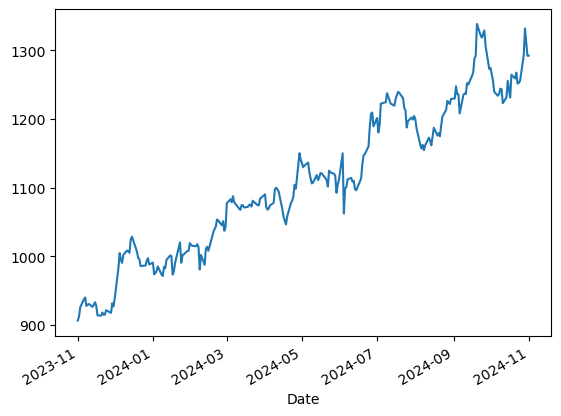

In [12]:
data['Adj Close'].plot()

In [108]:
# SIP 10K each month
data_close = pd.DataFrame()
data_close['Close']= data['Adj Close']

data_close["Date"] = data_close.index
data_close = data_close.resample('D').ffill()

In [109]:
def first_of_month(date):
    return date + pd.offsets.MonthEnd(-1) + pd.offsets.Day(1)

In [115]:
# Resample into monthly or extract first month row from dataframe
data_close['start_month'] = data_close['Date'].apply(first_of_month)
# sip_data = data_close[['Close', 'Begin of month']]
# sip_data.drop_duplicates()
# data_close.groupby(['Close', 'Begin of month']).first()
sip_dates = pd.DataFrame()
sip_dates['start_month'] = data_close['start_month'].drop_duplicates()
sip = sip_dates.join(data_close,  on = 'start_month', how = 'inner', lsuffix="l_")
sip
sip_data = sip[['Close', 'start_month']]
sip_data['share_bought'] = 10000/sip_data['Close']
sip_data['share_bought']= sip_data['share_bought'].apply(lambda x: math.floor(x))
sip_data['share_value'] = sip_data['share_bought']*sip['Close']
sip_data['return'] = sip_data['Close'].pct_change()*100
sip_data

,Close,start_month,share_bought,share_value,return
Date,,,,,
2023-11-01,906.248291,2023-11-01,11,9968.731201,NaN
2023-12-01,938.619629,2023-12-01,10,9386.196289,3.572016
2024-01-01,990.869812,2024-01-01,10,9908.698120,5.566705
2024-02-01,1016.400024,2024-02-01,9,9147.600220,2.576546
2024-03-01,1077.622925,2024-03-01,9,9698.606323,6.023504
2024-04-01,1090.264160,2024-04-01,9,9812.377441,1.173067
2024-05-02,1140.580933,2024-04-01,8,9124.647461,4.615099
2024-06-03,1111.481567,2024-05-01,8,8891.852539,-2.551276
2024-07-01,1201.506470,2024-07-01,8,9612.051758,8.099541


In [114]:
sip_data['share_bought'].sum(), sip_data['share_value'].sum(), abs(130000-sip_data['share_value'].sum())

(112, 122949.08203125, 7050.91796875)

In [123]:
# Invest 100K at once in and out as part of mean reversion strategy


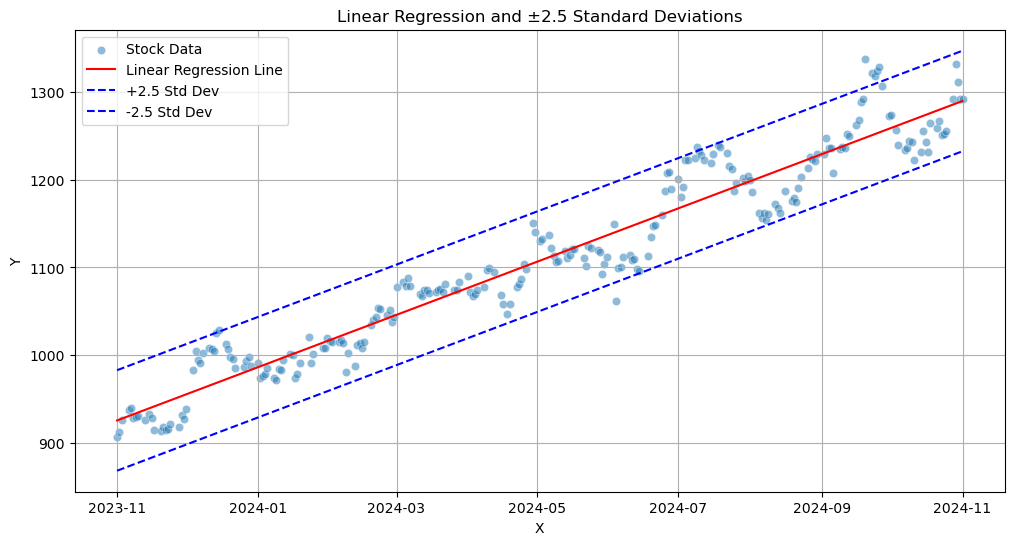

In [122]:
create_LR(data)

In [5]:
# compare the result

In [121]:
def create_LR(df):
    y = np.array(data['Adj Close'])
    X = np.array(pd.to_datetime(data['Adj Close'].index).map(dt.datetime.toordinal))

    intercept, slope = np.polynomial.polynomial.polyfit(X, y, deg =1)
    regression_line = (slope * X + intercept)

    std_dev = np.std(y - regression_line)
    # std_dev = np.std(y)
    plus_2_std = regression_line + 2 * std_dev
    minus_2_std = regression_line - 2 * std_dev
    X = np.array(data.index)
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=X, y=y, label='Stock Data', alpha=0.5)
    plt.plot(X, regression_line, color='red', label='Linear Regression Line')
    plt.plot(X, plus_2_std, color='blue', linestyle='--', label='+2.5 Std Dev')
    plt.plot(X, minus_2_std, color='blue', linestyle='--', label='-2.5 Std Dev')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression and ±2.5 Standard Deviations')
    plt.legend()
    plt.grid(True)
    return plt.show()